In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the video file
video_path = "/Users/djhamb/TennisVideos/TENNIS#1.mp4"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

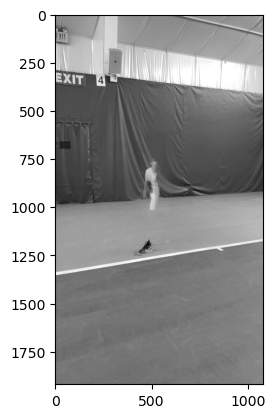

In [2]:
cap = cv2.VideoCapture(video_path)

# Get the dimensions of the video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
num_frames=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Buffer to store the last two frames
buffer_frames = np.zeros((num_frames, height, width), np.uint8)

# Define a threshold
threshold = 150

frame_idx=0
while cap.isOpened():
    ret, frame = cap.read()
    
    # If the video is finished, break out of the loop
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Add the frame to the buffer and ensure it only keeps the last two frames
    buffer_frames[frame_idx]=gray_frame
    frame_idx+=1
    

    
# Calculate the median frame
median_frame = np.median(buffer_frames, axis=0).astype(np.uint8)
plt.imshow(median_frame, cmap='gray')
plt.show()


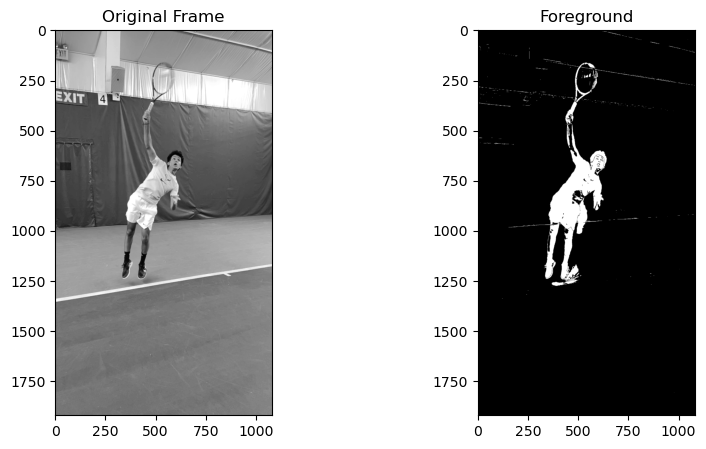

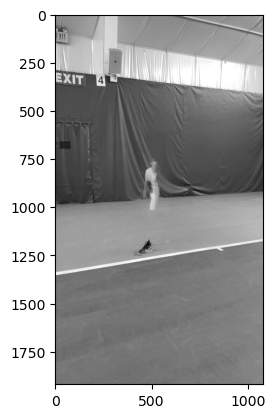

In [3]:
im = cv2.imread("/Users/djhamb/CONTACT#1.jpg")

threshold = 30
gray_frame = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
# Determine the foreground by comparing the current frame with the median
foreground = np.abs(np.int64(gray_frame) - np.int64(median_frame)) > threshold
foreground = np.uint8(foreground * 255) # Convert to 8-bit image
     
# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(gray_frame, cmap='gray')
plt.title('Original Frame')
plt.subplot(1, 2, 2)
plt.imshow(foreground, cmap='gray')
plt.title('Foreground')
plt.show()
plt.imshow(median_frame, cmap='gray')
plt.show()
# Release the video capture object
cap.release()

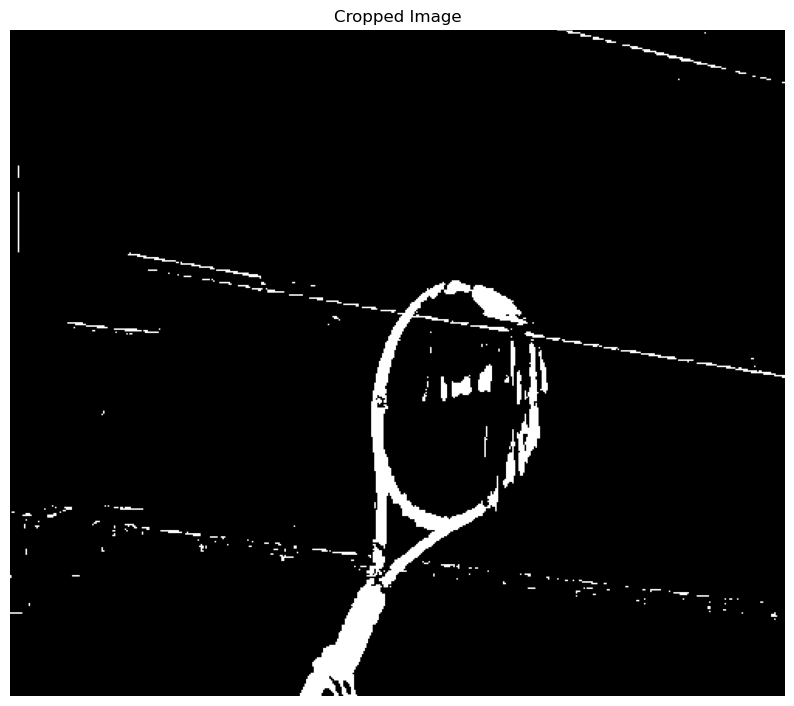

In [4]:
# Assuming foreground is the image you have from the previous cell

# Crop the image using indexing (as an example: keeping rows 10 to 90 and columns 10 to 90)
foreground_cropped = foreground[0:430, 250:750]

# Display the cropped image in grayscale
plt.figure(figsize=(10, 10))
plt.imshow(foreground_cropped, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')
plt.show()


TypeError: Invalid shape (430, 500, 3, 3) for image data

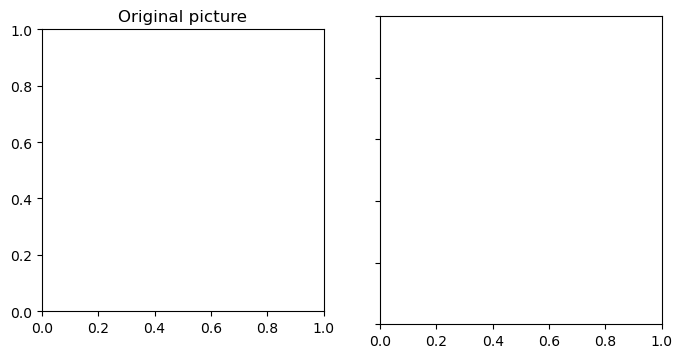

In [6]:
import matplotlib.pyplot as plt
from skimage import color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Assuming 'foreground_cropped' is your image

# Convert to grayscale if it's not already
if len(foreground_cropped.shape) == 3:
    image_gray = color.rgb2gray(foreground_cropped)
else:
    image_gray = foreground_cropped

# Detect edges using the Canny algorithm
edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

# Perform Hough Ellipse Transform
result = hough_ellipse(edges, accuracy=20, threshold=250, min_size=50, max_size=200)
result.sort(order='accumulator')

# Get the best ellipse
best = list(result[-1])
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
foreground_cropped=color.gray2rgb(foreground_cropped)
foreground_cropped[cy, cx] = [0, 0, 255]  # Update this line

# Draw the edge (white) and the resulting ellipse (red)
edges_rgb = color.gray2rgb(img_as_ubyte(edges))
edges_rgb[cy, cx] = [250, 0, 0]  # Update this line

# Plotting
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(foreground_cropped)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges_rgb)

plt.show()
